In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product
import matplotlib.pyplot as plt

In [2]:
# load dataset 2

In [3]:
df = pd.read_csv('2_distribution_applicant_sex_and_action_taken.csv', low_memory=False)

# 3 ethnicity and race distribution

## All the race and ethnicity columns we want

applicant_ethnicity_1                     
                 
co_applicant_ethnicity_1 

applicant_race_1                          
applicant_race_2                         

co_applicant_race_1                      
co_applicant_race_2                      

## Columns we use for the model

In [4]:
columns_of_interest = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1', 'applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']

In [5]:
info_df = df[columns_of_interest]
print(info_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279114 entries, 0 to 279113
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   applicant_ethnicity_1     277686 non-null  float64
 1   co_applicant_ethnicity_1  278612 non-null  float64
 2   applicant_race_1          278641 non-null  float64
 3   applicant_race_2          18150 non-null   float64
 4   co_applicant_race_1       278943 non-null  float64
 5   co_applicant_race_2       9085 non-null    float64
dtypes: float64(6)
memory usage: 12.8 MB
None


# Race

In [6]:
print(df['applicant_race_1'].value_counts())

5.0     207238
6.0      20988
2.0      20748
3.0      17683
21.0      4156
1.0       2592
22.0      1536
23.0       969
27.0       838
26.0       516
25.0       481
4.0        392
44.0       278
24.0       155
41.0        29
42.0        26
43.0        16
Name: applicant_race_1, dtype: int64


Values:
- 1 - American Indian or Alaska Native
- 2 - Asian
- 21 - Asian Indian
- 22 - Chinese
- 23 - Filipino
- 24 - Japanese
- 25 - Korean
- 26 - Vietnamese
- 27 - Other Asian
- 3 - Black or African American
- 4 - Native Hawaiian or Other Pacific Islander
- 41 - Native Hawaiian
- 42 - Guamanian or Chamorro
- 43 - Samoan
- 44 - Other Pacific Islander
- 5 - White
- 6 - Information not provided by applicant in mail, internet, or telephone application
- 7 - Not applicable

### We only want 5 - White and 3 - Black or African American

In [7]:
# Columns of interest
columns_of_race = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']

### remove not needed columns

In [8]:
# Filter the DataFrame to keep rows with categories 2 and 3 for the specified columns
filtered_race = df[columns_of_race].isin([5.0, 3.0])

# Filter the race columns
filtered_df_race = df[columns_of_race][filtered_race]

# Merge the filtered race columns with the rest of the DataFrame
filtered_df = pd.concat([df.drop(columns_of_race, axis=1), filtered_df_race], axis=1)

# Print the value counts for each column
for column in columns_of_race:
    print(f"{column}\n{filtered_df[column].value_counts()}")


applicant_race_1
5.0    207238
3.0     17683
Name: applicant_race_1, dtype: int64
applicant_race_2
5.0    2253
3.0     272
Name: applicant_race_2, dtype: int64
co_applicant_race_1
5.0    104261
3.0      4900
Name: co_applicant_race_1, dtype: int64
co_applicant_race_2
5.0    885
3.0     55
Name: co_applicant_race_2, dtype: int64


# Ethnicity

In [9]:
print(filtered_df['applicant_ethnicity_1'].value_counts())

2.0     227726
1.0      28095
3.0      17168
11.0      1989
14.0      1836
12.0       517
13.0       355
Name: applicant_ethnicity_1, dtype: int64


Values:
- 1 - Hispanic or Latino
- 11 - Mexican
- 12 - Puerto Rican
- 13 - Cuban
- 14 - Other Hispanic or Latino
- 2 - Not Hispanic or Latino
- 3 - Information not provided by applicant in mail, internet, or telephone application
- 4 - Not applicable

### We only want 2 - Not Hispanic or Latino & 1 - Hispanic or Latino 

In [10]:
columns_of_ethnicity = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

### remove not needed columns

In [11]:
# Filter the DataFrame to keep rows with categories 1 and 2 for the specified columns
filtered_ethnicity = filtered_df[columns_of_ethnicity].isin([1.0, 2.0])

# Filter the race columns
filtered_df_ethnicity = filtered_df[columns_of_ethnicity][filtered_ethnicity]

# Merge the filtered race columns with the rest of the DataFrame
filtered_df = pd.concat([filtered_df.drop(columns_of_ethnicity, axis=1), filtered_df_ethnicity], axis=1)

# Print the value counts for each column
for column in columns_of_ethnicity:
    print(f"{column}\n{filtered_df[column].value_counts()}")


applicant_ethnicity_1
2.0    227726
1.0     28095
Name: applicant_ethnicity_1, dtype: int64
co_applicant_ethnicity_1
2.0    113396
1.0     12237
Name: co_applicant_ethnicity_1, dtype: int64


# Visualisations

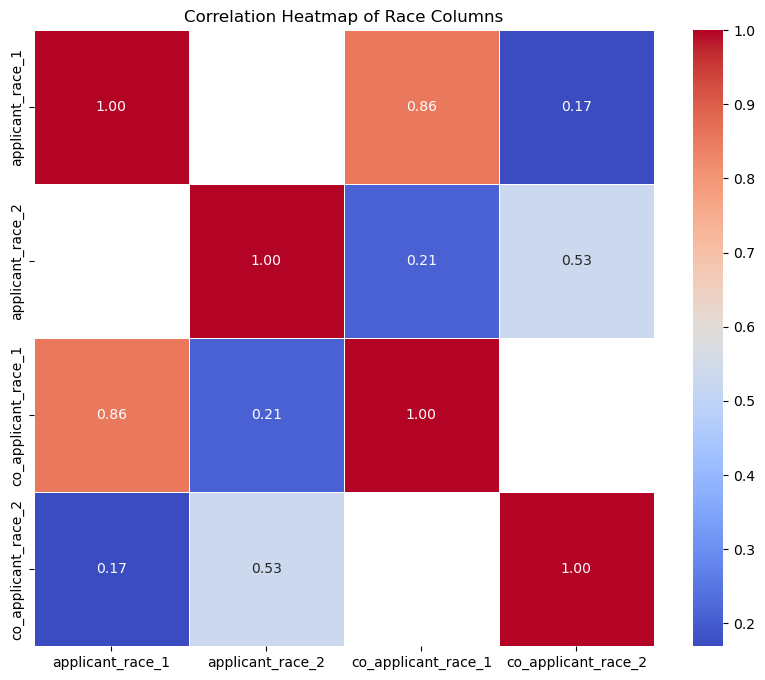

In [12]:
# Select the specified race columns
selected_columns = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
selected_df = filtered_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Race Columns')
plt.show()

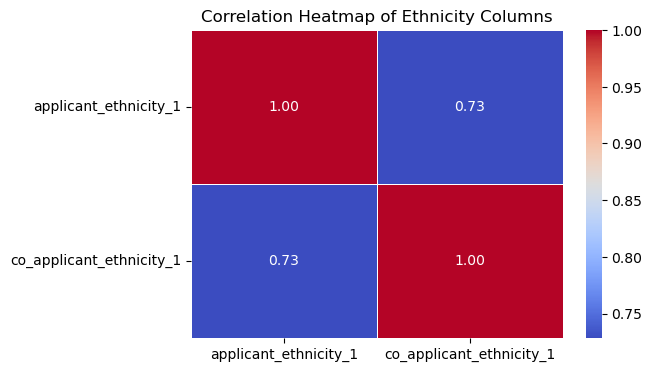

In [13]:
# Select the specified ethnicity columns
columns_of_ethnicity = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']
ethnicity_df =  filtered_df[columns_of_ethnicity]

# Calculate the correlation matrix
correlation_matrix_ethnicity = ethnicity_df.corr()

# Plot the heatmap for ethnicity columns
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_ethnicity, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Ethnicity Columns')
plt.show()

In [14]:
# Define the race and ethnicity categories
race_categories = ['5.0', '3.0']
ethnicity_categories = ['2.0', '1.0']

# Define the columns for race and ethnicity
race_columns = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
ethnicity_columns = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

# Initialize counts for each combination
race_counts = [[0] * len(race_categories) for _ in range(len(race_columns))]
ethnicity_counts = [[0] * len(ethnicity_categories) for _ in range(len(ethnicity_columns))]

# Iterate through the DataFrame and count combinations
for idx, row in filtered_df.iterrows():
    for i, col in enumerate(race_columns):
        race_val = str(row[col])
        if race_val in race_categories:
            race_counts[i][race_categories.index(race_val)] += 1

    for i, col in enumerate(ethnicity_columns):
        ethnicity_val = str(row[col])
        if ethnicity_val in ethnicity_categories:
            ethnicity_counts[i][ethnicity_categories.index(ethnicity_val)] += 1

# Now, race_counts and ethnicity_counts have the counts for each combination
print('Race Counts:', race_counts)
print('Ethnicity Counts:', ethnicity_counts)


Race Counts: [[207238, 17683], [2253, 272], [104261, 4900], [885, 55]]
Ethnicity Counts: [[227726, 28095], [113396, 12237]]


In [15]:
def generate_counts_table(counts, categories):
    df = pd.DataFrame(counts, columns=['1.0', '2.0'], index=categories)
    df.index.name = 'ethnicity_categories'
    return df

ethnicity_categories = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

# Generate and display the Ethnicity Counts table
print('Ethnicity Counts:')
ethnicity_table = generate_counts_table(ethnicity_counts, ethnicity_categories)
print(ethnicity_table)

Ethnicity Counts:
                             1.0    2.0
ethnicity_categories                   
applicant_ethnicity_1     227726  28095
co_applicant_ethnicity_1  113396  12237


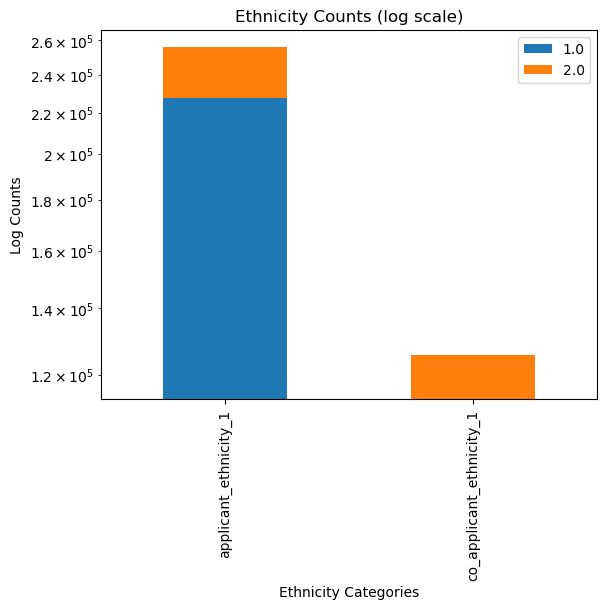

In [16]:
# Plot the Ethnicity Counts on a logarithmic scale
ethnicity_table.plot(kind='bar', stacked=True, logy=True)
plt.xlabel('Ethnicity Categories')
plt.ylabel('Log Counts')
plt.title('Ethnicity Counts (log scale)')
plt.show()

In [17]:
import pandas as pd

def generate_counts_table(counts, categories):
    df = pd.DataFrame(counts, columns=['5.0', '3.0'], index=categories)
    df.index.name = 'race_categories'
    return df

race_categories = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']

# Generate and display the Race Counts table
print('Race Counts:')
race_table = generate_counts_table(race_counts, race_categories)
print(race_table)


Race Counts:
                        5.0    3.0
race_categories                   
applicant_race_1     207238  17683
applicant_race_2       2253    272
co_applicant_race_1  104261   4900
co_applicant_race_2     885     55


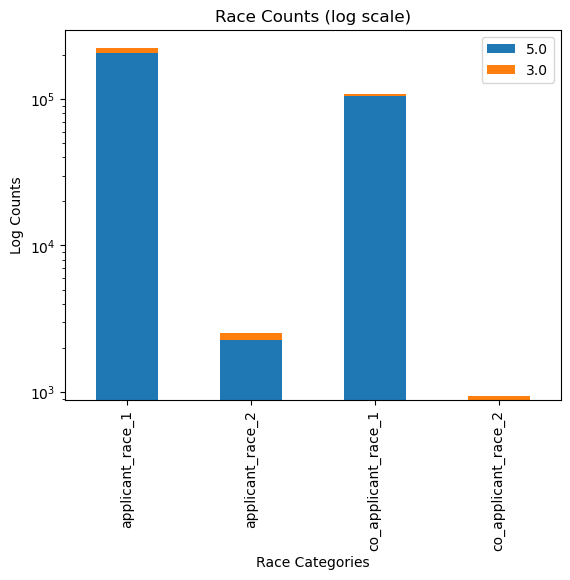

In [18]:
# Plot the Race Counts on a logarithmic scale
race_table.plot(kind='bar', stacked=True, logy=True)
plt.xlabel('Race Categories')
plt.ylabel('Log Counts')
plt.title('Race Counts (log scale)')
plt.show()

## See all the WHITE applicants.

In [19]:
# Filter the DataFrame to include only 'applicant_race_1' with value 5.0
filtered_df_applicant_race_1_5 = filtered_df[(filtered_df['applicant_race_1'] == 5.0)]

race_columns1 = ['applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
ethnicity_columns1 = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

# Select specific columns
selected_columns = race_columns1 + ethnicity_columns1
filtered_df_selected_columns = filtered_df_applicant_race_1_5[selected_columns]

In [20]:
filtered_df_selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207238 entries, 1 to 279113
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   applicant_race_2          0 non-null       float64
 1   co_applicant_race_1       101143 non-null  float64
 2   co_applicant_race_2       532 non-null     float64
 3   applicant_ethnicity_1     200255 non-null  float64
 4   co_applicant_ethnicity_1  102056 non-null  float64
dtypes: float64(5)
memory usage: 9.5 MB


In [21]:
# Sort with NaN values at the bottom
df_sorted = pd.concat([filtered_df_selected_columns.dropna(), 
                       filtered_df_selected_columns[filtered_df_selected_columns.isna().any(axis=1)]], 
                      ignore_index=True)

# Calculate summary statistics
statistics = df_sorted.describe()

In [22]:
print(statistics)

       applicant_race_2  co_applicant_race_1  co_applicant_race_2  \
count               0.0        101143.000000           532.000000   
mean                NaN             4.987266             4.913534   
std                 NaN             0.159082             0.407146   
min                 NaN             3.000000             3.000000   
25%                 NaN             5.000000             5.000000   
50%                 NaN             5.000000             5.000000   
75%                 NaN             5.000000             5.000000   
max                 NaN             5.000000             5.000000   

       applicant_ethnicity_1  co_applicant_ethnicity_1  
count          200255.000000             102056.000000  
mean                1.891753                  1.901956  
std                 0.310693                  0.297376  
min                 1.000000                  1.000000  
25%                 2.000000                  2.000000  
50%                 2.000000        

# Conclusion
- White applicants generally have only one race.
- Most co applicants for white people are black.
- Some co applicants have a 2nd race.

- White applicants do NOT have Hispanic or Latino ethnicity
- Same for the co applicant.

## See all the BLACK applicants.

In [23]:
# Filter the DataFrame to include only 'applicant_race_1' with value 5.0
filtered_df_applicant_race_1_3 = filtered_df[(filtered_df['applicant_race_1'] == 3.0)]

race_columns2 = ['applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
ethnicity_columns2 = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

# Select specific columns
selected_columns2 = race_columns2 + ethnicity_columns2
filtered_df_selected_columns2 = filtered_df_applicant_race_1_3[selected_columns2]

In [24]:
filtered_df_selected_columns2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17683 entries, 0 to 279037
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   applicant_race_2          466 non-null    float64
 1   co_applicant_race_1       4749 non-null   float64
 2   co_applicant_race_2       73 non-null     float64
 3   applicant_ethnicity_1     16444 non-null  float64
 4   co_applicant_ethnicity_1  4654 non-null   float64
dtypes: float64(5)
memory usage: 828.9 KB


In [25]:
# Sort with NaN values at the bottom
df_sorted2 = pd.concat([filtered_df_selected_columns2.dropna(), 
                       filtered_df_selected_columns2[filtered_df_selected_columns2.isna().any(axis=1)]], 
                      ignore_index=True)

# Calculate summary statistics
statistics2 = df_sorted2.describe()

In [26]:
print(statistics2)

       applicant_race_2  co_applicant_race_1  co_applicant_race_2  \
count             466.0          4749.000000            73.000000   
mean                5.0             3.280480             4.671233   
std                 0.0             0.694545             0.746376   
min                 5.0             3.000000             3.000000   
25%                 5.0             3.000000             5.000000   
50%                 5.0             3.000000             5.000000   
75%                 5.0             3.000000             5.000000   
max                 5.0             5.000000             5.000000   

       applicant_ethnicity_1  co_applicant_ethnicity_1  
count           16444.000000                4654.00000  
mean                1.972270                   1.95144  
std                 0.164205                   0.21497  
min                 1.000000                   1.00000  
25%                 2.000000                   2.00000  
50%                 2.000000        

# Conclusion
- Black applicants mostly are one race, but some are mixed.
- co applicants for black people are fairly evenly spread black and white.
- Some co applicants have a 2nd race.

- Black applicants do NOT have Hispanic or Latino ethnicity
- Same for the co applicant.

In [27]:
filtered_df['applicant_race_1'] = filtered_df['applicant_race_1'].astype('Int64')
filtered_df['co_applicant_race_1'] = filtered_df['co_applicant_race_1'].astype('Int64')
filtered_df['applicant_ethnicity_1'] = filtered_df['applicant_ethnicity_1'].astype('Int64')
filtered_df['co_applicant_ethnicity_1'] = filtered_df['co_applicant_ethnicity_1'].astype('Int64')

In [28]:
filtered_df.head()

,census_tract,action_taken,loan_type,lien_status,reverse_mortgage,open_end_line_of_credit,loan_amount,combined_loan_to_value_ratio,interest_rate,total_loan_costs,...,co_applicant_sex,applicant_age,co_applicant_age,aus_1,applicant_race_1,applicant_race_2,co_applicant_race_1,co_applicant_race_2,applicant_ethnicity_1,co_applicant_ethnicity_1
0,9.003416e+09,3,2,1,2,2,115000,98.188,NaN,NaN,...,5,35-44,9999,1,3,NaN,<NA>,NaN,2,<NA>
1,4.209120e+10,1,1,1,2,2,355000,75.822,4.25,8352.71,...,2,35-44,>74,1,5,NaN,5,NaN,2,2
2,6.067006e+09,1,1,1,2,2,265000,77.612,3.5,1983.0,...,5,45-54,9999,6,5,NaN,<NA>,NaN,2,<NA>
3,5.513320e+10,1,2,1,2,2,285000,84.777,4.125,6854.68,...,2,35-44,35-44,6,5,NaN,5,NaN,2,2
4,5.513320e+10,1,1,1,2,2,295000,95.0,3.5,4700.6,...,5,35-44,9999,6,5,NaN,<NA>,NaN,2,<NA>


In [29]:
filtered_df.to_csv('3_distribution_race_ethnicity.csv', index=False)